<a href="https://colab.research.google.com/github/ollihansen90/zeugs/blob/main/Localblur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


image_url = "https://static.wixstatic.com/media/78ab91_e55452455df64179af5a1245aa543e5b~mv2.jpg/v1/fill/w_640,h_568,al_c,q_85,usm_0.66_1.00_0.01,enc_auto/78ab91_e55452455df64179af5a1245aa543e5b~mv2.jpg"
import requests
from io import BytesIO

response = requests.get(image_url)
img = transforms.ToTensor()(Image.open(BytesIO(response.content)))

print(img.shape)


torch.Size([3, 568, 640])


In [2]:
class Blur():
    def __init__(self, d, size=11, sigma=10):
        self.blur = torch.nn.Conv2d(d,d,kernel_size=size, groups=d, bias=False, padding=size//2)
        base = torch.arange(-size//2, size//2)
        blurrmat = torch.exp(-base**2/sigma**2).unsqueeze(-1)@torch.exp(-base**2/sigma**2).unsqueeze(0)
        #print(blurrmat)
        self.blur.weight.data = (blurrmat/torch.sum(blurrmat)).repeat(d,1,1,1)#torch.ones(d,1,size,size).float()/size**2
        #print(self.blur.weight.data.shape)
    def __call__(self, x):
        return self.blur(x)

blur = Blur(3, size=21, sigma=20)
blurred_img = blur(img)

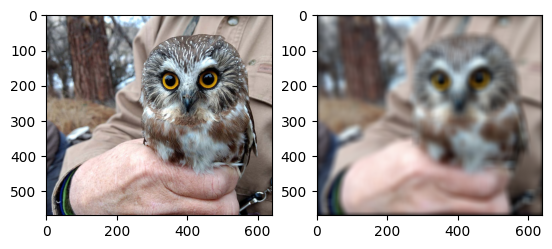

tensor([11]) tensor([423])
torch.Size([3, 568, 640]) torch.Size([3, 568, 640])


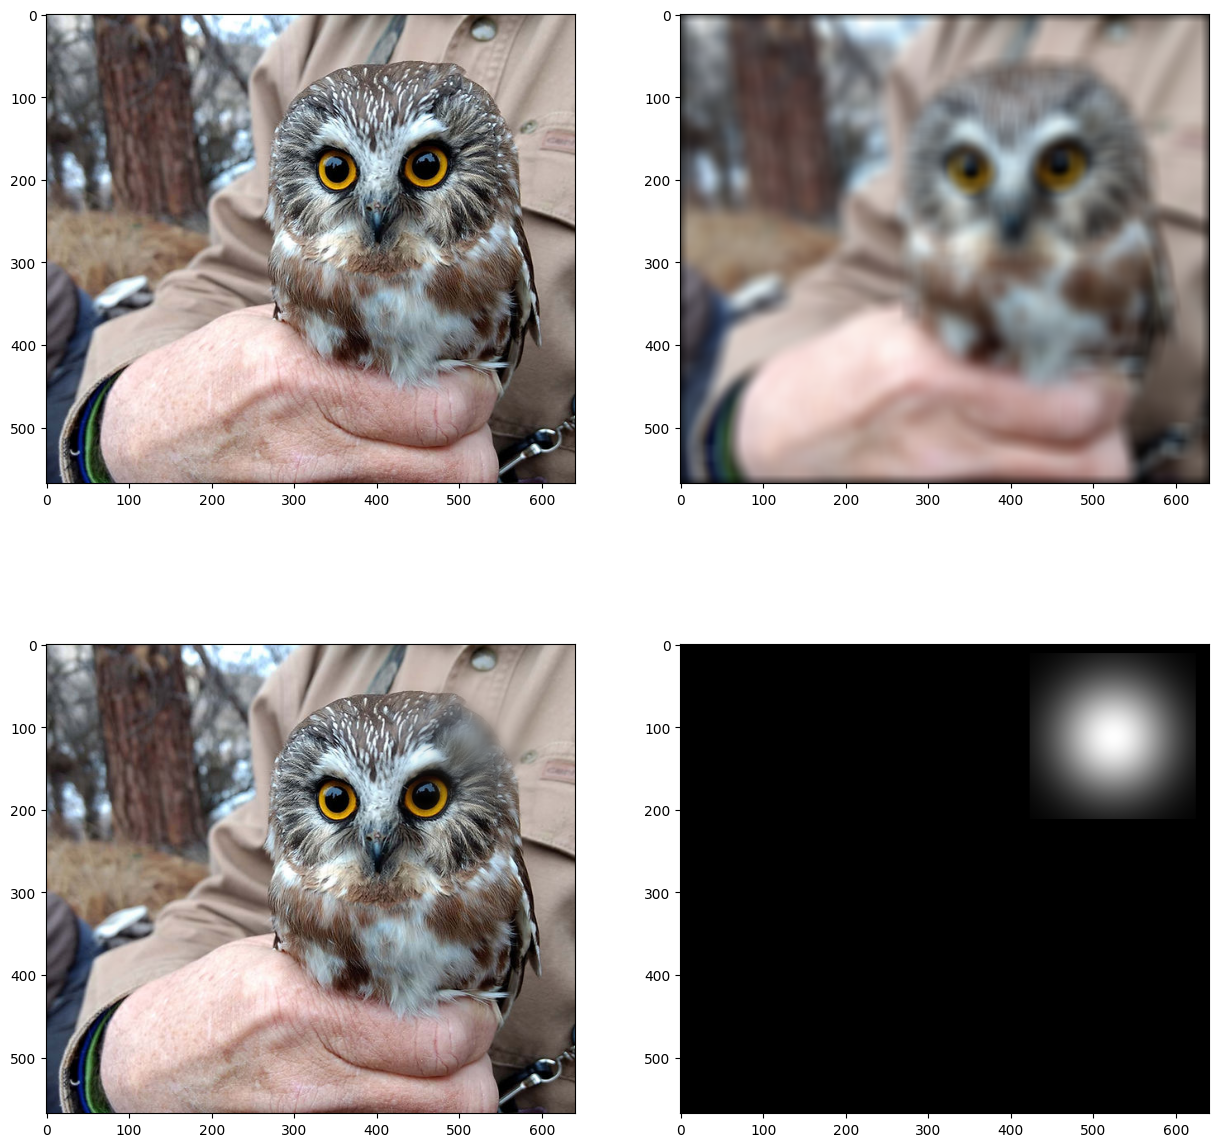

In [20]:
def torch2np(x):
    return x.transpose(0,1).transpose(1,2).detach().cpu().numpy()
plt.figure()
plt.subplot(1,2,1)
plt.imshow(torch2np(img))
plt.subplot(1,2,2)
plt.imshow(torch2np(blurred_img))
plt.show()



mat = torch.zeros_like(img[0])

size = 201
sigma = 70
base = torch.arange(-size//2, size//2)
loc_i, loc_j = torch.randint(0,len(mat)-size, (1,)),torch.randint(0,len(mat[1]-size), (1,))
print(loc_i, loc_j)

mat[loc_i:loc_i+size, loc_j:loc_j+size] = torch.exp(-base**2/sigma**2).unsqueeze(-1)@torch.exp(-base**2/sigma**2).unsqueeze(0)
localblur = mat
localblur /= torch.max(localblur)

localblur = localblur.repeat(3,1,1)
print(localblur.shape, img.shape)

locallyblurred_img = img*(1-localblur)+localblur*blurred_img
plt.figure(figsize=[15,15])
plt.subplot(2,2,1)
plt.imshow(torch2np(img))
plt.subplot(2,2,2)
plt.imshow(torch2np(blurred_img))
plt.subplot(2,2,3)
plt.imshow(torch2np(locallyblurred_img))
plt.subplot(2,2,4)
plt.imshow(torch2np(localblur))
plt.show()